In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_file='D:/Mish mash/Training_Data_Sets_NEWDATA.csv'

In [3]:
mm=pd.read_csv(data_file)

In [4]:
mm.isnull().sum()

s.no                                  0
EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0


In [5]:
mm.shape

(12000, 39)

In [6]:
mm.dtypes

s.no                                    int64
EQ                                    float64
Social_Search_Impressions               int64
Social_Search_Working_cost              int64
Digital_Impressions                     int64
Digital_Working_cost                    int64
Print_Impressions.Ads40                 int64
Print_Working_Cost.Ads50                int64
OOH_Impressions                         int64
OOH_Working_Cost                        int64
SOS_pct                                 int64
Digital_Impressions_pct                 int64
CCFOT                                   int64
Median_Temp                             int64
Median_Rainfall                       float64
Fuel_Price                            float64
Inflation                             float64
Trade_Invest                            int64
Brand_Equity                          float64
Avg_EQ_Price                          float64
Any_Promo_pct_ACV                     float64
Any_Feat_pct_ACV                  

In [7]:
discrete_feature=[feature for feature in mm.columns if len(mm[feature].unique())<100 and feature not in ['s.no']]
print('discrete_variables:{}'.format(len(discrete_feature)))

discrete_variables:4


In [8]:
discrete_feature

['SOS_pct', 'Digital_Impressions_pct', 'CCFOT', 'Median_Temp']

In [9]:
mm.nunique()

s.no                                  12000
EQ                                    12000
Social_Search_Impressions             11997
Social_Search_Working_cost            11442
Digital_Impressions                   11997
Digital_Working_cost                  11819
Print_Impressions.Ads40               11774
Print_Working_Cost.Ads50              11621
OOH_Impressions                       12000
OOH_Working_Cost                      11987
SOS_pct                                  50
Digital_Impressions_pct                  50
CCFOT                                    90
Median_Temp                              47
Median_Rainfall                       11293
Fuel_Price                             2565
Inflation                             11419
Trade_Invest                           6865
Brand_Equity                            159
Avg_EQ_Price                           1778
Any_Promo_pct_ACV                      8542
Any_Feat_pct_ACV                        401
Any_Disp_pct_ACV                

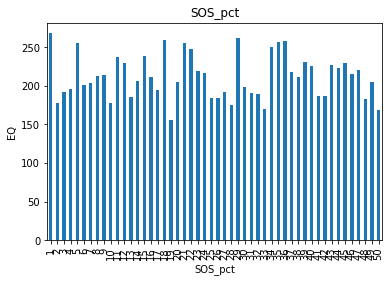

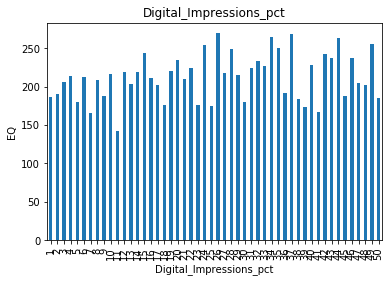

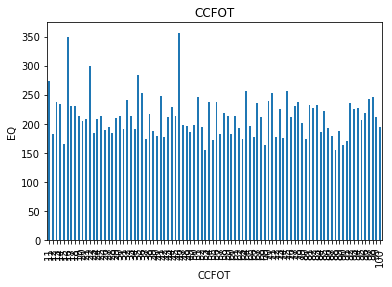

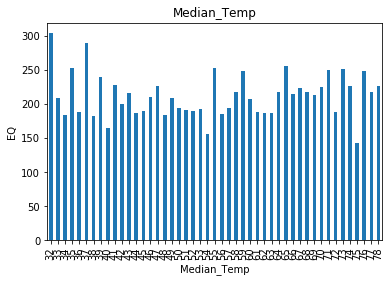

In [10]:
## Finding the relation between the discrete features and target variable
for feature in discrete_feature:
    dat=mm.copy()
    dat.groupby(feature)['EQ'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('EQ')
    plt.title(feature)
    plt.show()

In [11]:
numerical_features=[feature for feature in mm.columns if mm[feature].dtypes!='O' and discrete_feature ]
print('numerical variables:',len(numerical_features))

numerical variables: 39


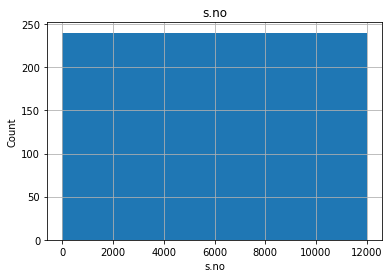

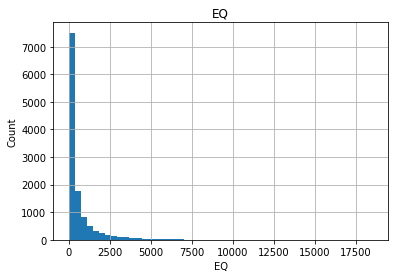

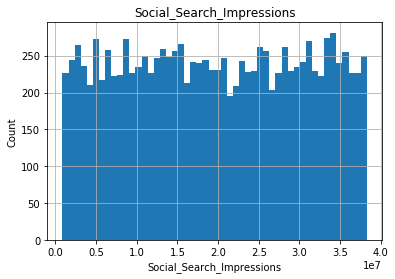

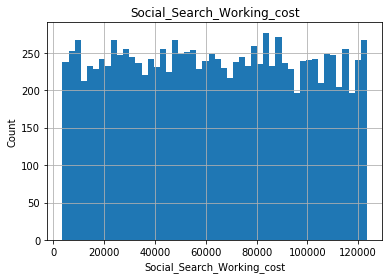

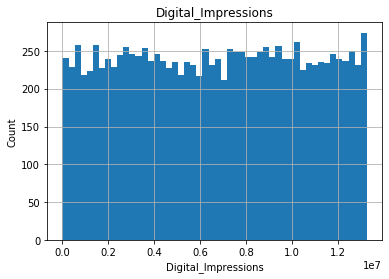

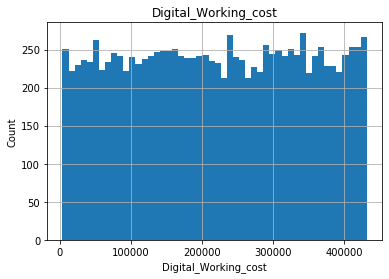

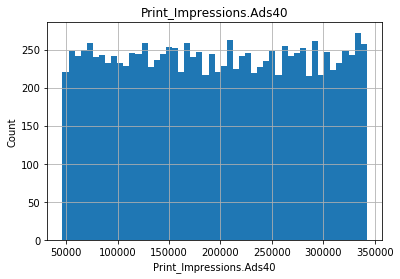

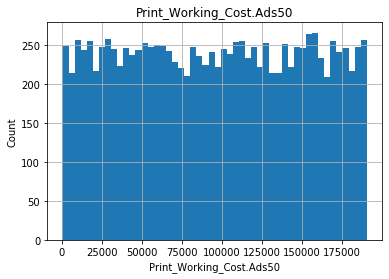

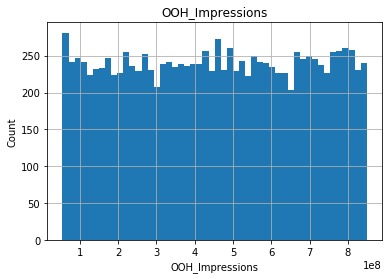

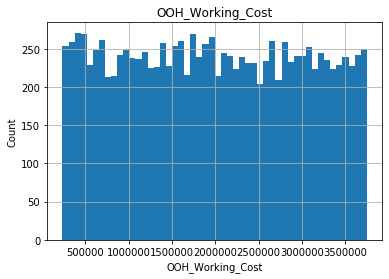

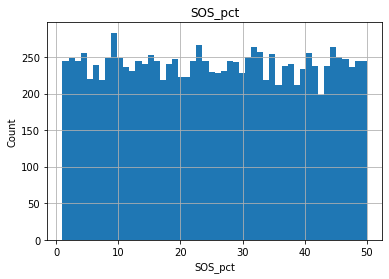

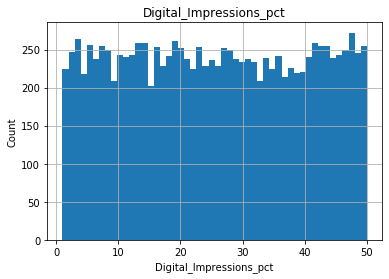

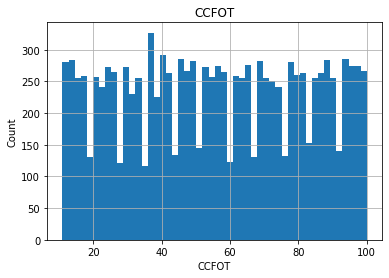

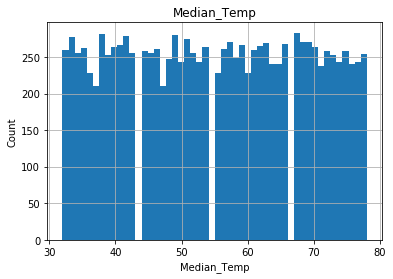

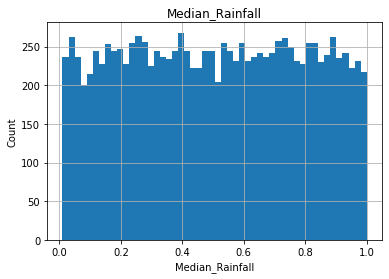

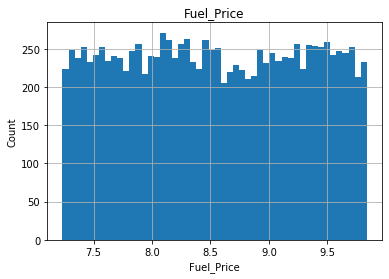

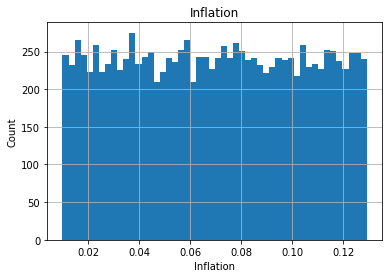

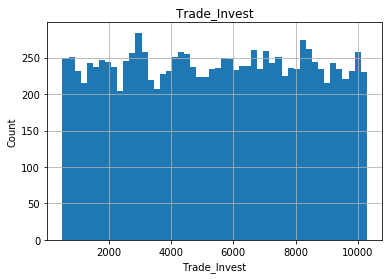

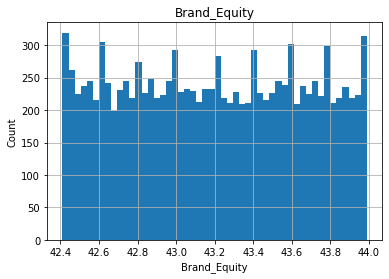

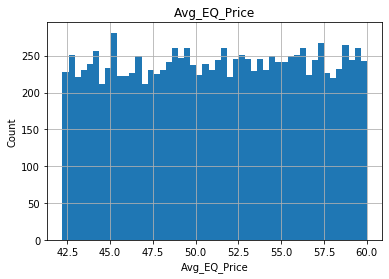

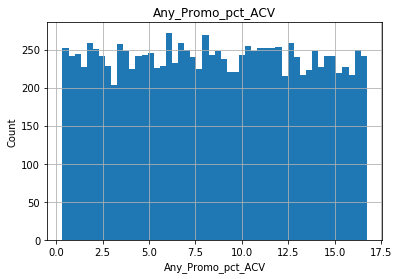

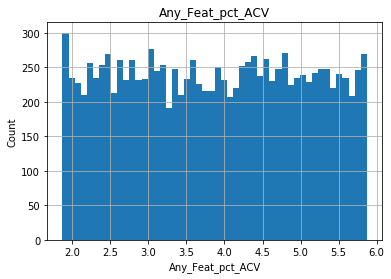

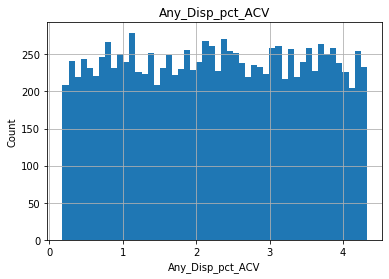

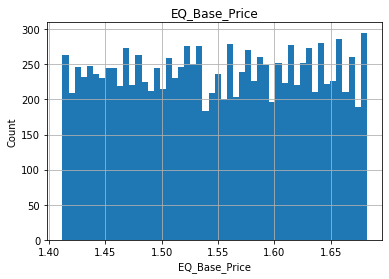

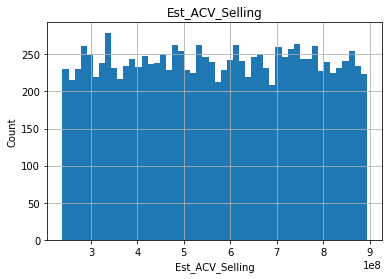

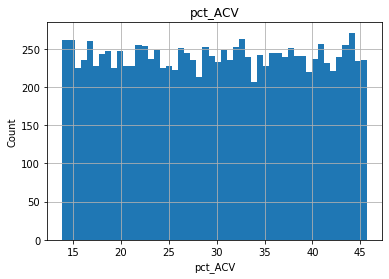

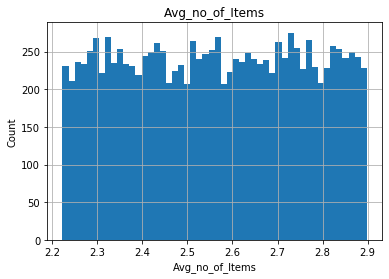

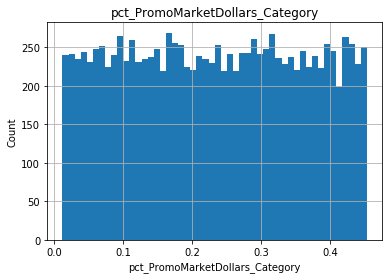

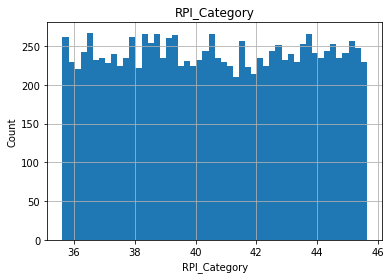

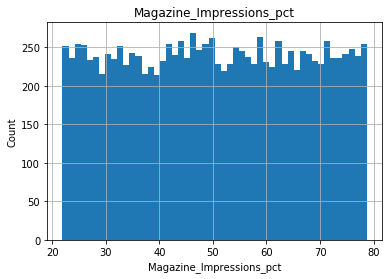

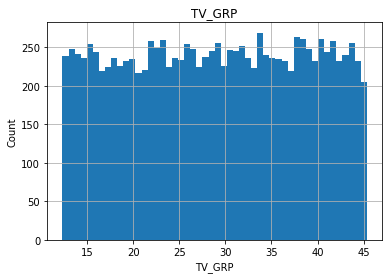

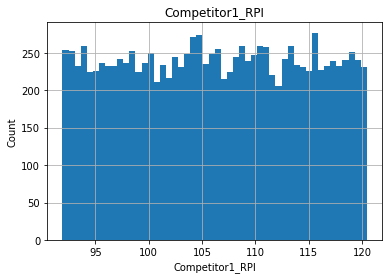

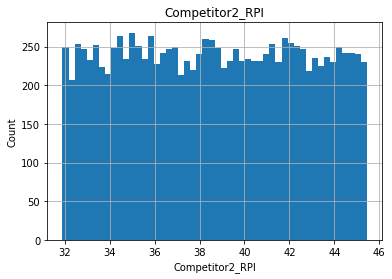

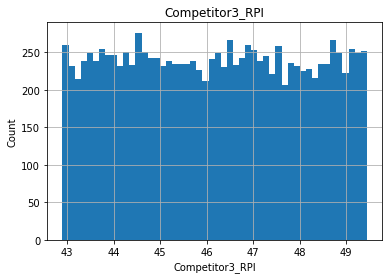

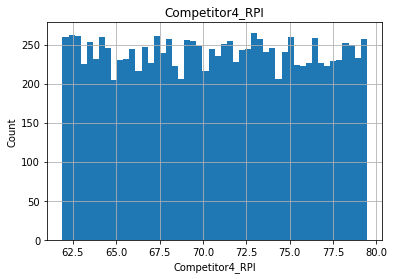

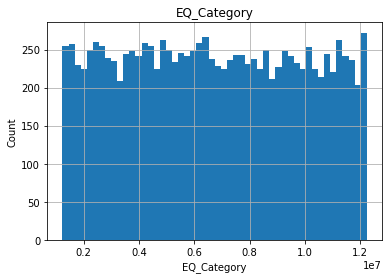

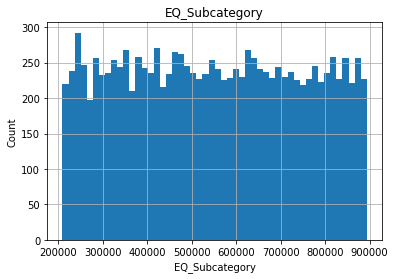

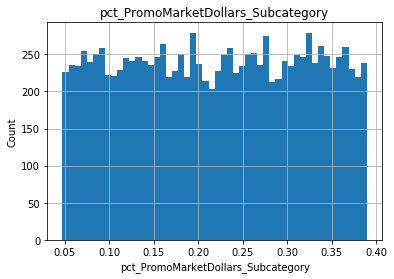

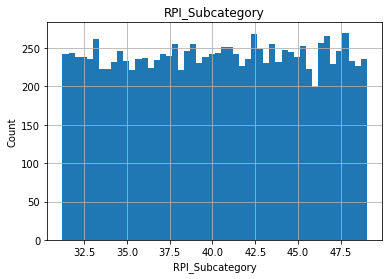

In [12]:
## observing the the distrubution of data
for feature in numerical_features:
    dat=mm.copy()
    dat[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### Above observation: Data is not normally distributed,Before modelling the data has to be converted to normal distribution

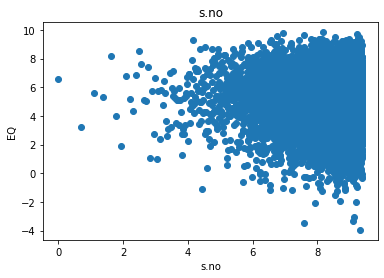

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


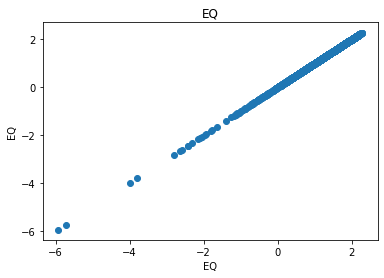

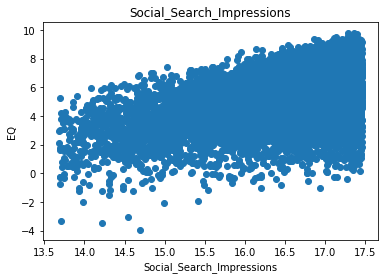

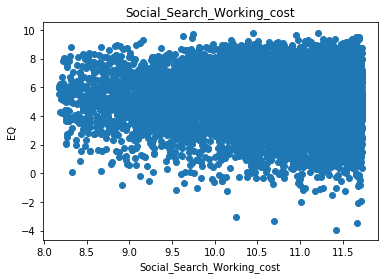

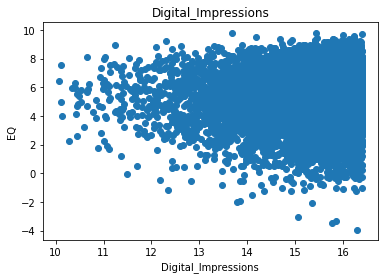

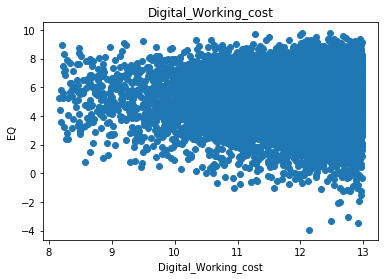

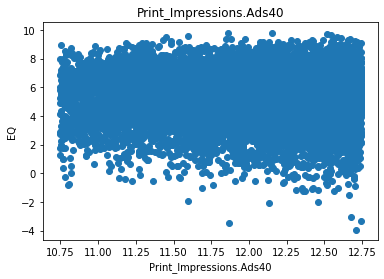

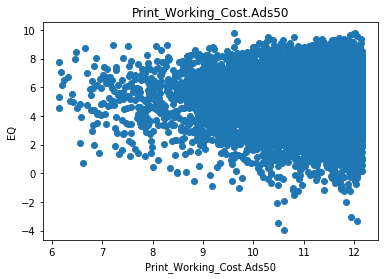

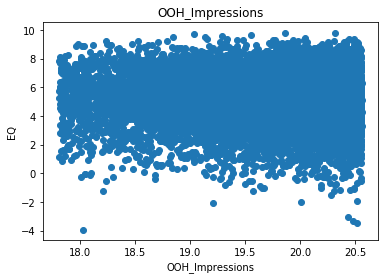

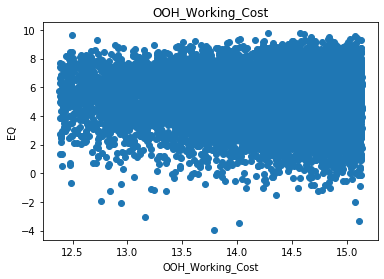

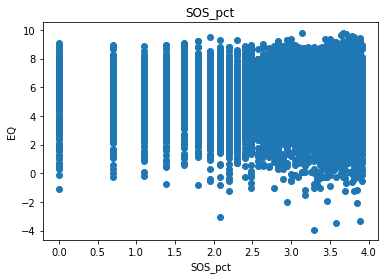

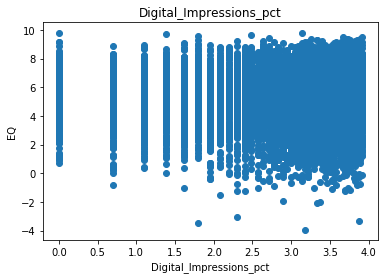

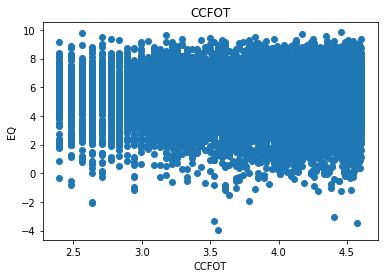

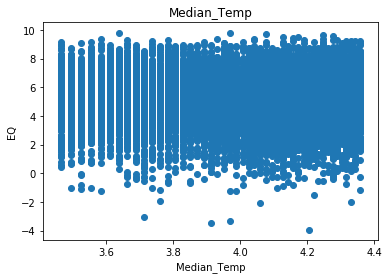

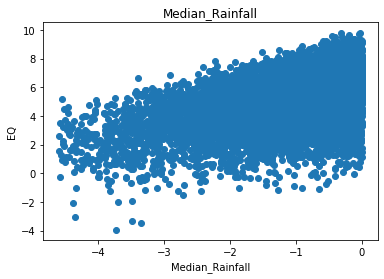

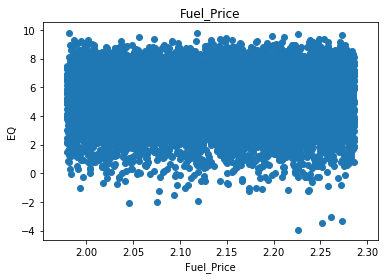

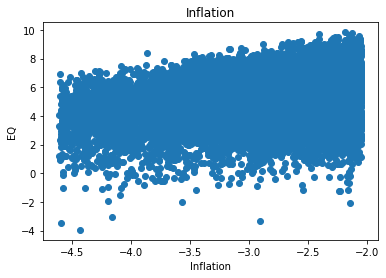

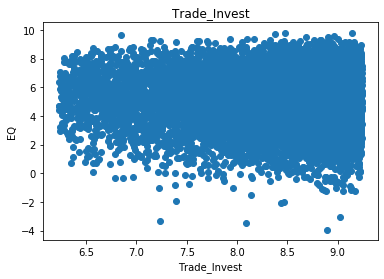

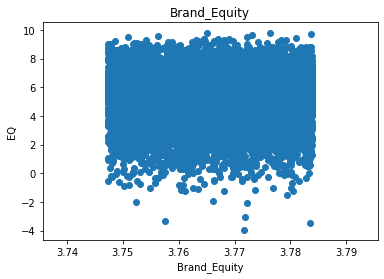

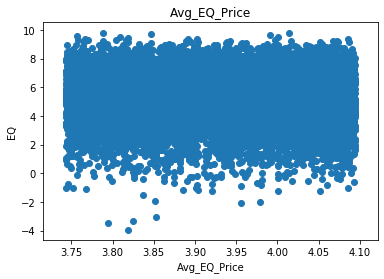

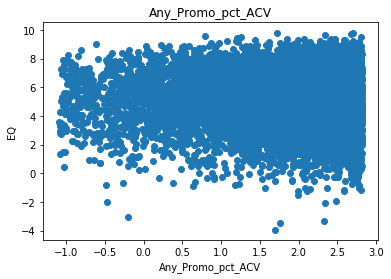

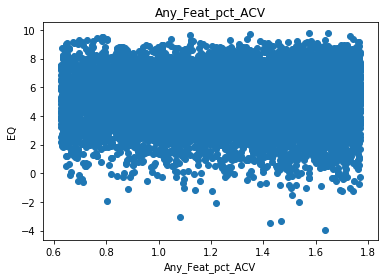

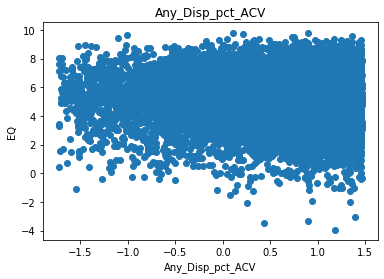

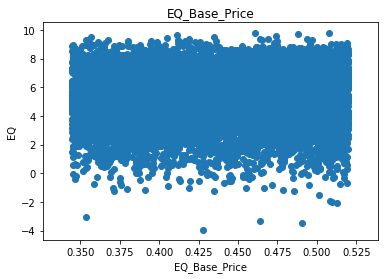

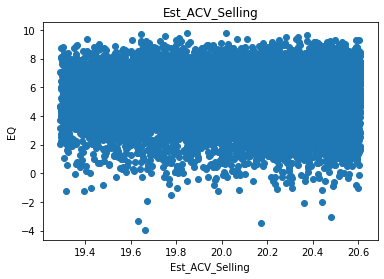

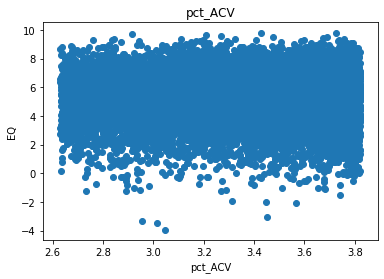

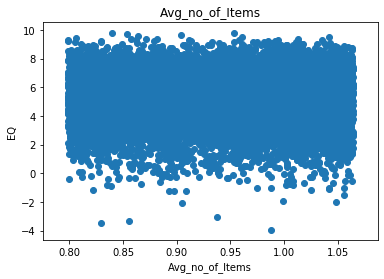

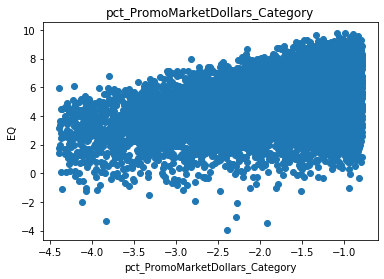

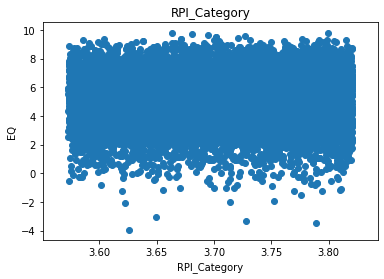

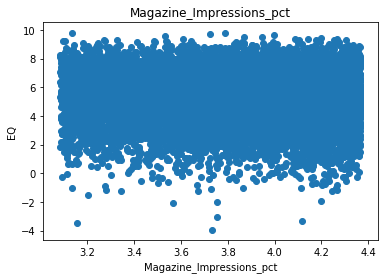

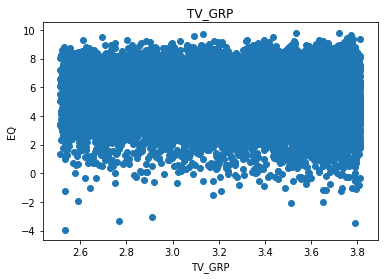

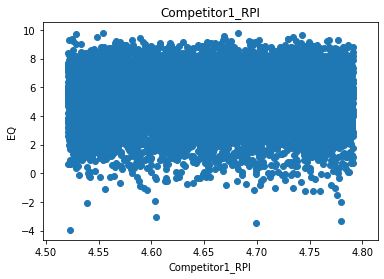

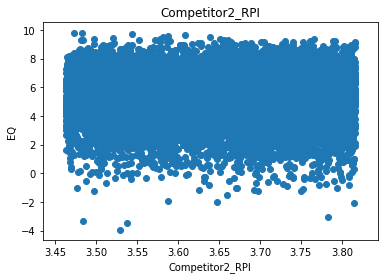

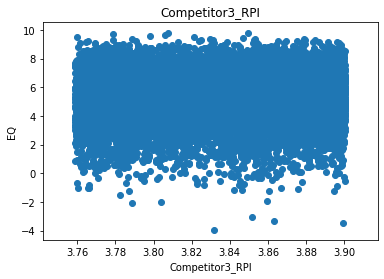

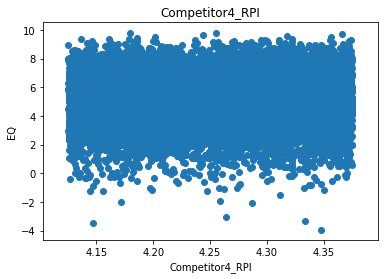

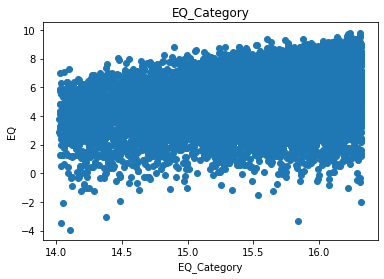

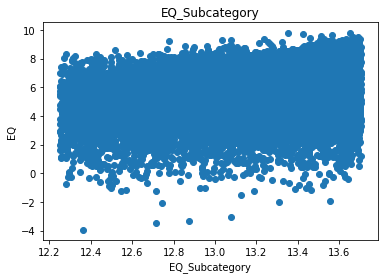

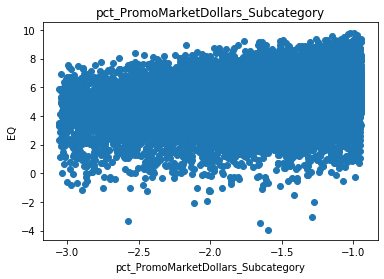

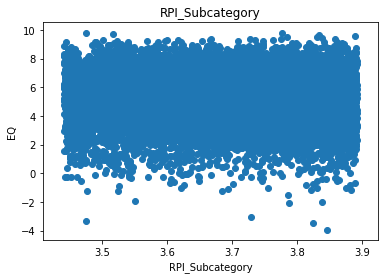

In [75]:
## Verifing linear relation between target variable and independent variable by applying log normal distribution
for feature in numerical_features:
    dat=mm.copy()
    if 0 in dat[feature].unique():
        pass
    else:
        dat[feature]=np.log(dat[feature])
        dat['EQ']=np.log(dat['EQ'])
        plt.scatter(dat[feature],dat['EQ'])
        plt.xlabel(feature)
        plt.ylabel('EQ')
        plt.title(feature)
        plt.show()

###### By the above observation we can clearly find some relation between Socia_search_impression and target variable, Median Rainfall and target variable, inflation and target variable. This information will be helfull to select the features 

In [53]:
dat.head()

,s.no,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


### No linear relation observed between target and independent variable. 

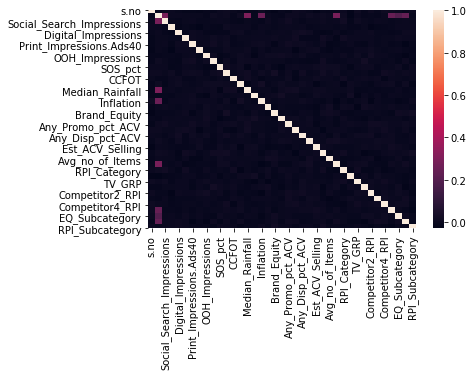

In [76]:
## Finding the corr
sns.heatmap(mm.corr())

##### There is no correlation between independent variables. so, all independent variables are independt each other as per the above figure

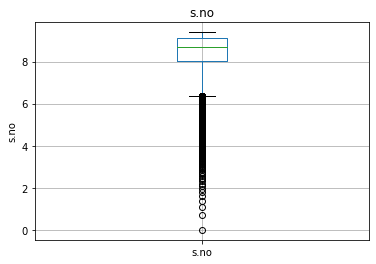

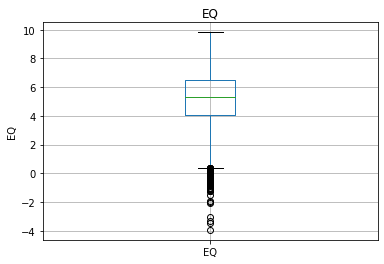

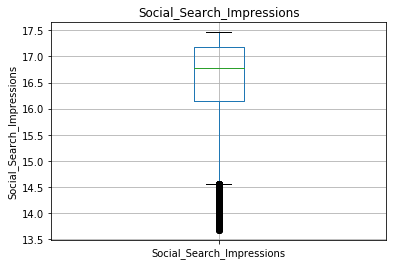

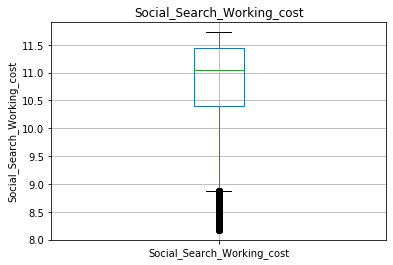

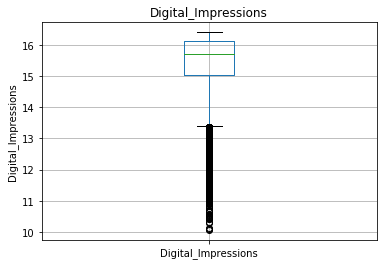

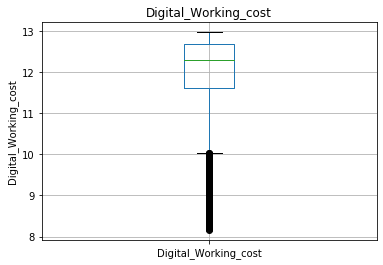

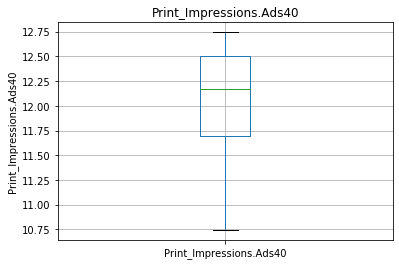

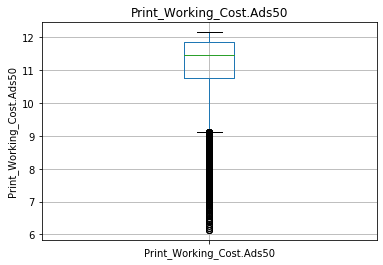

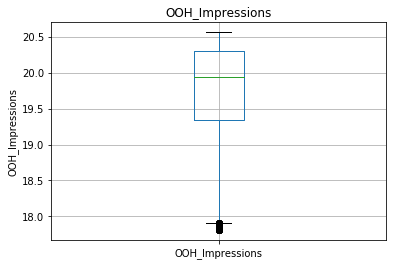

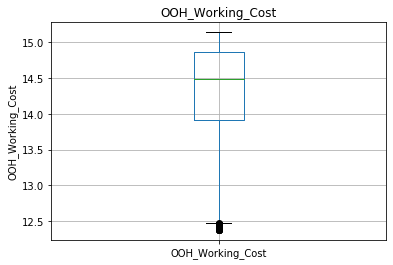

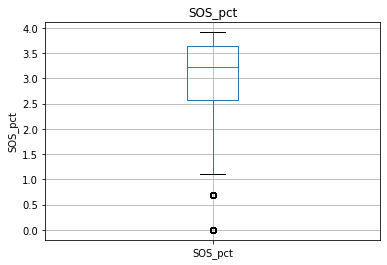

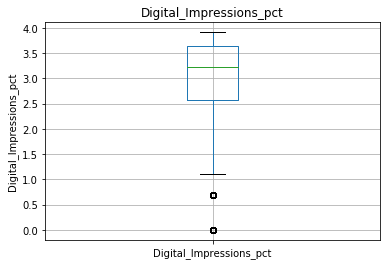

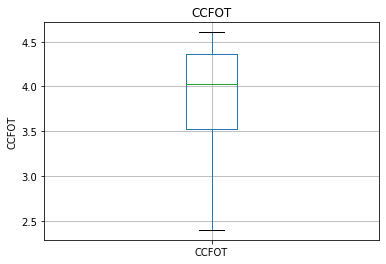

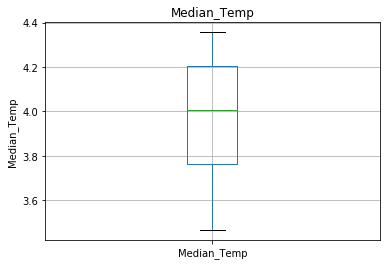

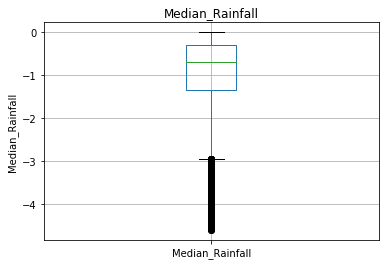

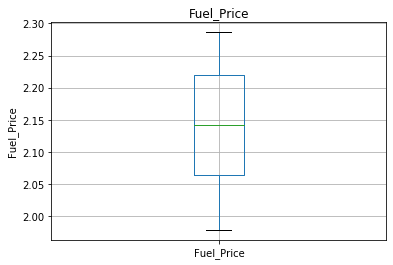

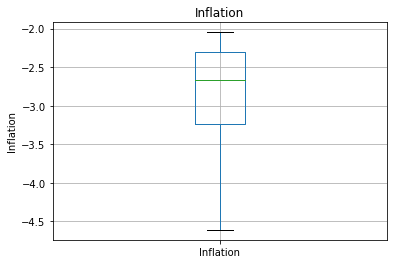

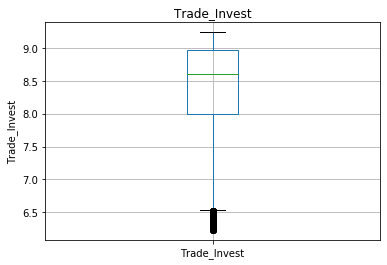

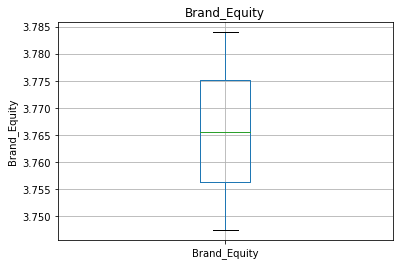

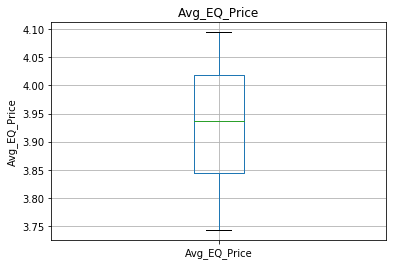

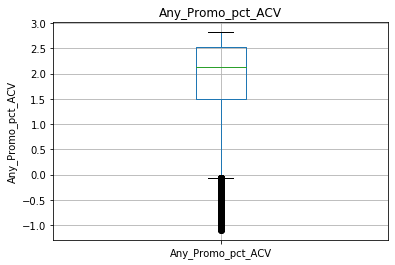

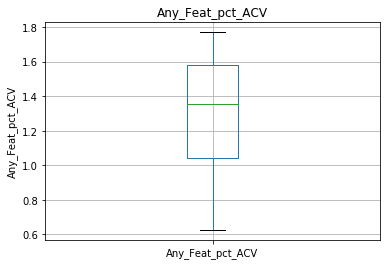

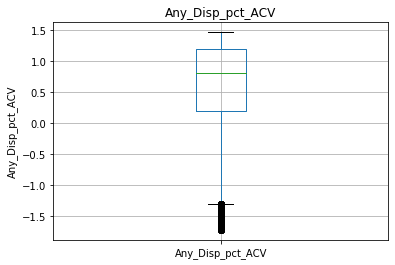

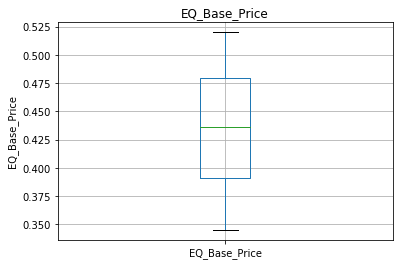

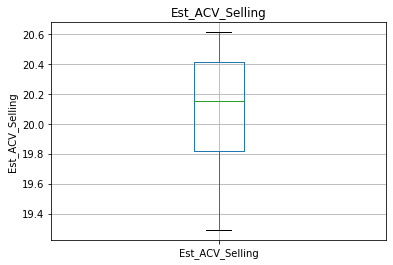

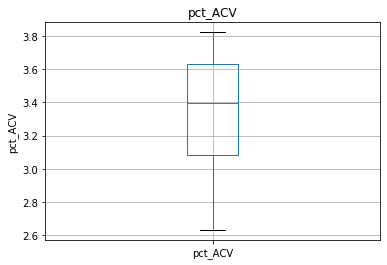

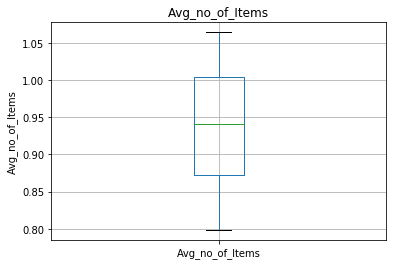

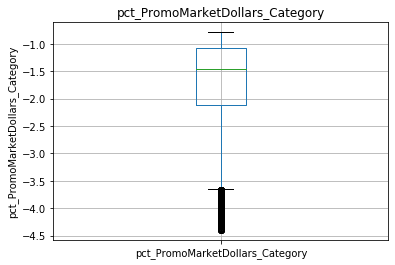

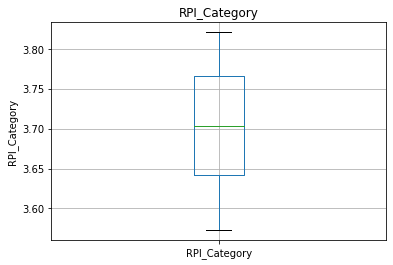

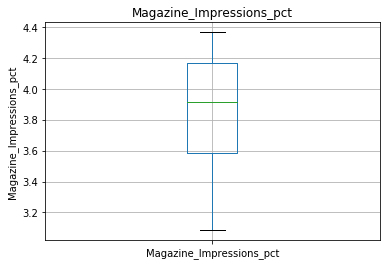

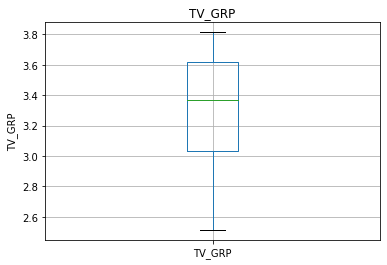

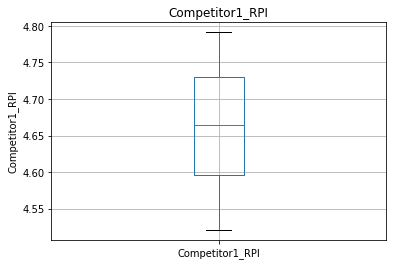

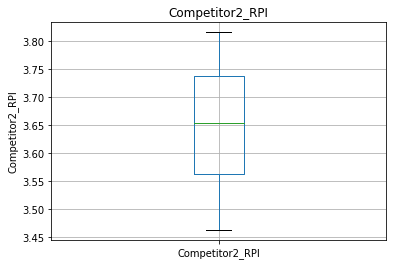

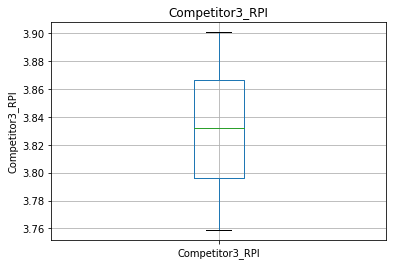

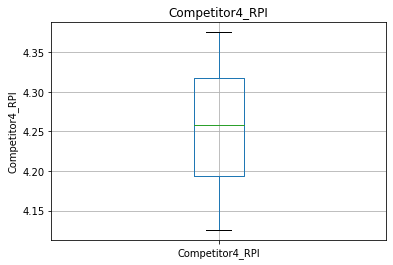

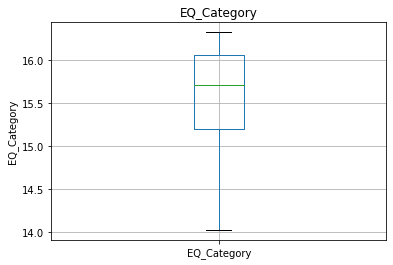

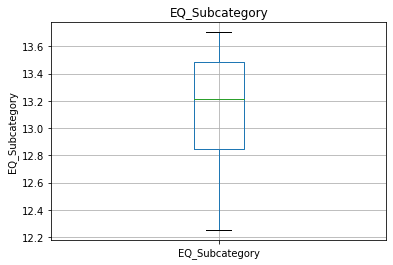

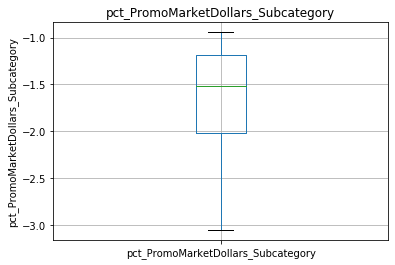

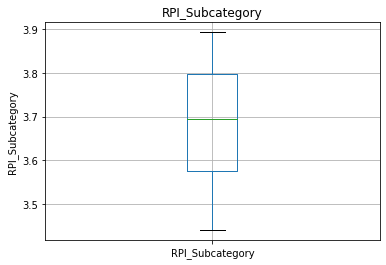

In [77]:
# Finding outliers
for feature in numerical_features:
    dat=mm.copy()
    if 0 in dat[feature].unique():
        pass
    else:
        dat[feature]=np.log(dat[feature])
        dat.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##### By observing above figures there is an out liers for some variables like, social_search impression,Digital working cost etc.

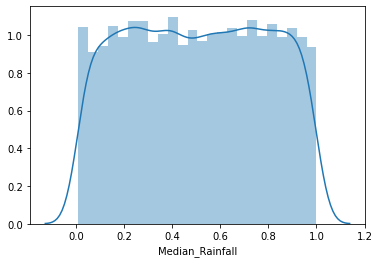

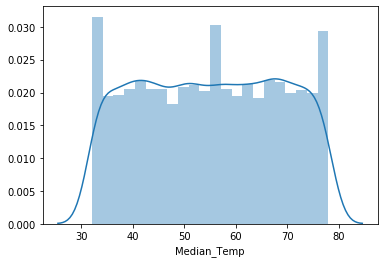

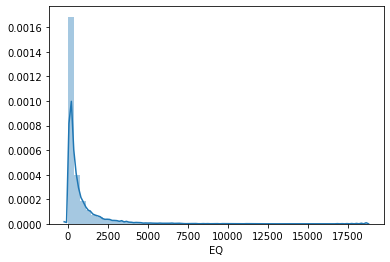

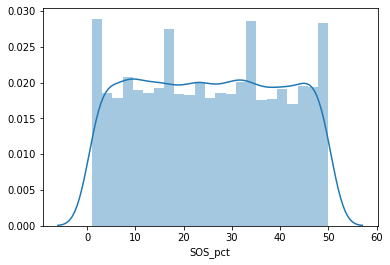

In [78]:
sns.distplot(mm["Median_Rainfall"])
plt.show()
sns.distplot(mm['Median_Temp'])
plt.show()
sns.distplot(mm['EQ'])
plt.show()
sns.distplot(mm['SOS_pct'])


In [2]:
#### The above graphs clearly says that EQ(target variable is Right skew distribution)

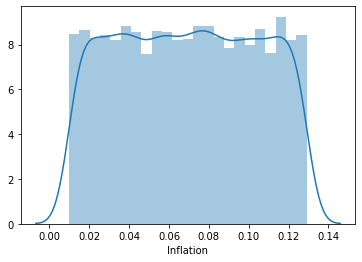

In [79]:
sns.distplot(mm['Inflation'])

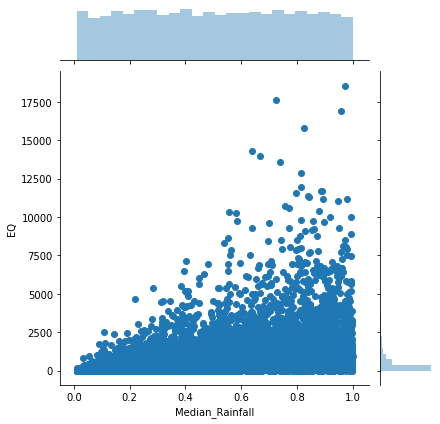

In [80]:
## As per the above figures we got some relation between Median rainfall and EQ . Now we are verifing the relation.
## the below graph shows increase in rainfall wii increase the sales
sns.jointplot(x="Median_Rainfall", y="EQ", data=mm)

## Hypothesis generation

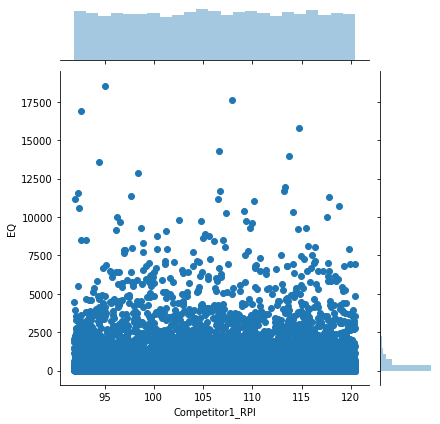

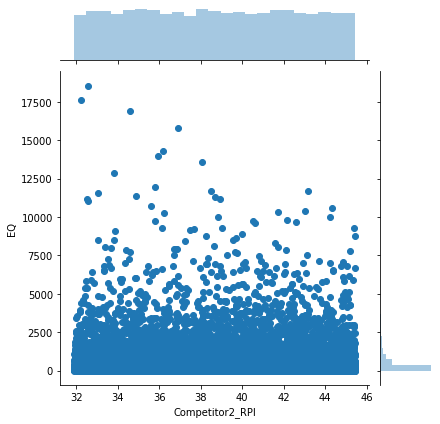

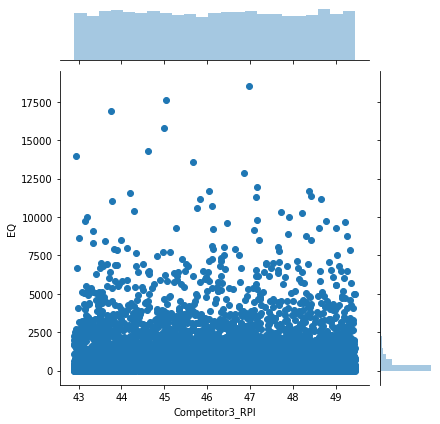

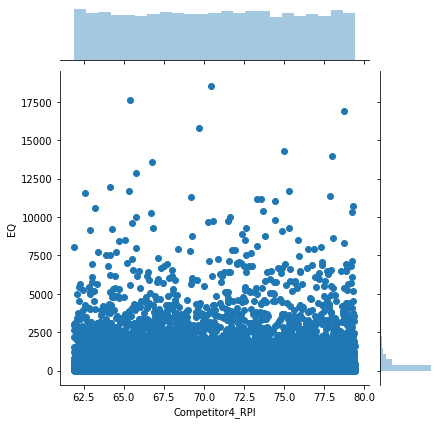

In [82]:
## Stores having similar establishments nearby should have less sales because of more competition.
## Observing the relation between competitor and sales.

sns.jointplot(x="Competitor1_RPI", y="EQ", data=mm)
plt.show()
sns.jointplot(x="Competitor2_RPI", y="EQ", data=mm)
sns.jointplot(x="Competitor3_RPI", y="EQ", data=mm)
sns.jointplot(x="Competitor4_RPI", y="EQ", data=mm)

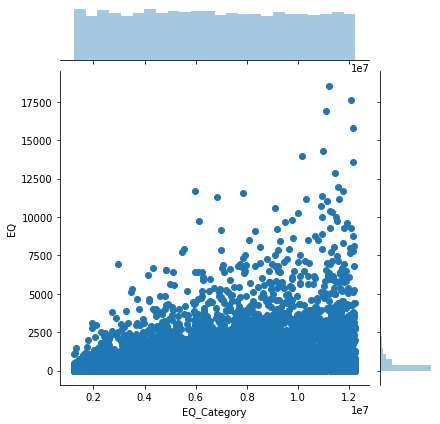

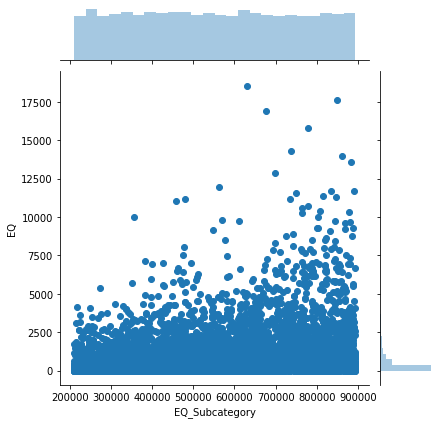

In [83]:
## EQ category will also play major role in Sales(EQ)
sns.jointplot(x="EQ_Category", y="EQ", data=mm)
sns.jointplot(x="EQ_Subcategory", y="EQ", data=mm)

##### As per my Hypothesis there is strong relation between EQ_Category and Sales(EQ)

In [13]:
mm.drop(["s.no"],axis=1,inplace=True)

In [14]:
num_features=[mm.columns]

In [15]:
num_features

[Index(['EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
        'Digital_Impressions', 'Digital_Working_cost',
        'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
        'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
        'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
        'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
        'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
        'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
        'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
        'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
        'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
        'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
        'RPI_Subcategory'],
       dtype='object')]

## Converting data into log normal distribution

In [16]:
for feature in num_features:
    mm[feature]=np.log(mm[feature])

In [17]:
mm.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,6.577108,16.918164,10.947503,15.859857,12.382963,11.927932,6.950815,18.536053,14.573328,1.609438,...,3.992127,2.800933,4.660699,3.587124,3.836437,4.274302,15.505615,13.072246,-0.976572,3.823629
1,3.239507,15.259934,11.568313,15.580975,12.148984,12.483735,11.640280,19.466586,14.357438,3.637586,...,4.186468,2.749832,4.716622,3.768384,3.862413,4.218036,16.313303,12.825412,-1.380312,3.555919
2,5.592061,15.718886,11.381518,16.381112,9.888577,11.921752,10.558439,20.509802,14.266421,2.197225,...,3.808439,3.174297,4.701843,3.644405,3.897112,4.286341,16.295394,12.328219,-0.999944,3.833413
3,5.342677,17.421966,11.167487,14.740092,12.206627,12.442953,10.891522,20.318962,13.735084,2.197225,...,4.320683,2.569554,4.759949,3.673004,3.788951,4.290596,15.767905,13.220111,-2.987764,3.640214
4,8.155411,16.980710,11.233344,16.043025,11.090294,12.538526,11.463504,18.120190,14.422539,3.258097,...,4.040416,3.706719,4.746496,3.606856,3.816833,4.328626,16.256884,12.445652,-1.505528,3.667656


## Feature Scaling

In [18]:
feature_scale=[feature for feature in mm.columns if feature not in ['EQ']]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(mm[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_data=pd.concat([mm['EQ'].reset_index(drop=True),
                pd.DataFrame(scaler.transform(mm[feature_scale]),columns=feature_scale)],axis=1)

In [21]:
scaled_data.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,6.577108,0.856566,0.781436,0.914968,0.876723,0.592089,0.135395,0.263761,0.795787,0.411408,...,0.707892,0.221377,0.517649,0.351956,0.546665,0.596364,0.644990,0.565091,0.984281,0.847844
1,3.239507,0.417797,0.956323,0.870956,0.828164,0.870154,0.914213,0.602256,0.717542,0.929848,...,0.859721,0.182108,0.724424,0.864299,0.729735,0.370832,0.997198,0.394967,0.792931,0.254054
2,5.592061,0.539236,0.903701,0.997231,0.359049,0.588997,0.734543,0.981741,0.684555,0.561659,...,0.564384,0.508283,0.669778,0.513866,0.974294,0.644621,0.989388,0.052291,0.973204,0.869544
3,5.342677,0.989873,0.843407,0.738250,0.840127,0.849752,0.789861,0.912321,0.491983,0.561659,...,0.964577,0.043577,0.884628,0.594703,0.211992,0.661676,0.759366,0.667003,0.031089,0.441024
4,8.155411,0.873116,0.861960,0.943875,0.608448,0.897566,0.884855,0.112485,0.741137,0.832842,...,0.745618,0.917416,0.834885,0.407730,0.408498,0.814110,0.972595,0.133228,0.733585,0.501890


In [22]:
pd.DataFrame(scaled_data).to_csv("scaled_data.csv",index=False)

## Feature selection

In [101]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
mm_train,mm_test=train_test_split(scaled_data,test_size=0.2,random_state=2)

In [105]:
x_train=mm_train.drop('EQ',axis=1)
y_train=mm_train["EQ"]

In [106]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [107]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
       False])

In [110]:
selected_features=x_train.columns[(feature_sel_model.get_support())]

print("total features:{}".format((x_train.shape[1])))
print('selected features:{}'.format(len(selected_features)))
print("feature with weights turned to zero:{}".format(
    np.sum(feature_sel_model.estimator_.coef_==0)))

total features:37
selected features:7
feature with weights turned to zero:30


In [111]:
x_train=x_train[selected_features]

In [115]:
x_train.head()

,Social_Search_Impressions,Median_Rainfall,Inflation,pct_PromoMarketDollars_Category,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory
4437,0.843713,0.962406,0.934884,0.951839,0.823949,0.549945,0.646876
1801,0.944113,0.434889,0.831041,0.409211,0.877645,0.927059,0.666961
8814,0.807512,0.776514,0.948670,0.988794,0.963236,0.847863,0.481991
10836,0.545633,0.744557,0.855334,0.716775,0.993061,0.627612,0.743519
2085,0.748226,0.938172,0.599102,0.898838,0.124438,0.895097,0.584468


## Finally After feature selection 7 important variables
- Social_Search_Impressions
- Median_rainfall
- Inflation
- Pct_prmo marketdollars_category
- EQ_Category
- EQ_Subcategory
- pct_PromoMarketDollars_Subcategory

In [141]:
## Modelling
from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [ ]:
lm.fit(x_train,y_train)

In [118]:
x_test=mm_test.drop('EQ',axis=1)
y_test=mm_test["EQ"]

In [120]:
feature_test=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_test.fit(x_test,y_test)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [121]:
selected_test=x_test.columns[(feature_test.get_support())]

In [122]:
x_test=x_test[selected_test]

In [123]:
predict_sales=lm.predict(x_test)

In [127]:
predict_sales.shape

(2400,)

In [124]:
from sklearn.metrics import mean_absolute_error

In [125]:
MAE=mean_absolute_error(y_test,predict_sales)
MAE

4.265330346090711e-08

In [128]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [129]:
mean_absolute_percentage_error(y_test, predict_sales)

7.407216677398256e-06

In [130]:
X_train=mm_train.drop('EQ',axis=1)
Y_train=mm_train["EQ"]

In [145]:
lmp=LinearRegression()
lmp.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
X_test=mm_test.drop('EQ',axis=1)
Y_test=mm_test["EQ"]

In [146]:
y_pred=lmp.predict(X_test)

In [147]:
y_pred

array([7.10262038, 4.68606102, 7.50365305, ..., 1.26615164, 5.31873513,
       5.00042808])

In [148]:
mean_absolute_percentage_error(Y_test,y_pred)

7.263000763300534e-06

In [149]:
X_train.shape

(9600, 37)

In [152]:
clf=DecisionTreeRegressor()

In [151]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
params={'criterion':['mae','mse'],
        'max_depth':[None,5,10,15,20,30,50,70],
        'min_samples_leaf':[1,2,5,10,15,20],
        'min_samples_split':[2,5,10,15,20],
        "max_features":[2,5,10,15]
}

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
random_search=RandomizedSearchCV(clf, cv=10, param_distributions=params,
                    scoring='neg_mean_absolute_error',n_iter=5, n_jobs=-1,
                    verbose=False)

In [157]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_dist

In [158]:
dtree=random_search.best_estimator_
dtree

DecisionTreeRegressor(criterion='mae', max_depth=15, max_features=15,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [159]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mae', max_depth=15, max_features=15,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [160]:
y_pred1=dtree.predict(X_test)

In [161]:
mean_absolute_percentage_error(Y_test,y_pred1)

67.24209284089301

In [162]:
MAE1=mean_absolute_error(Y_test,y_pred1)
MAE1

0.7035078303335137

In [164]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [165]:
reg=BayesianRidge()

In [166]:
reg.fit(X_train,Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [168]:
y_pred2=reg.predict(X_test)

In [169]:
mean_absolute_percentage_error(Y_test,y_pred2)

7.26300003180996e-06

## THE major Drivers for Sales(EQ) are 
- Social_Search_Impressions
- Median_rainfall
- Inflation
- Pct_prmo marketdollars_category
- EQ_Category
- EQ_Subcategory
- pct_PromoMarketDollars_Subcategory
